<a href="https://colab.research.google.com/github/vitor-thompson/aula_python_uerj/blob/main/Projeto1_Python_2025_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Primeiro Projeto de Python**

Nesse primeiro projeto da disciplina de Python, vocês deverão criar um programa para calcular $\pi$ de duas maneiras diferentes:
* Com o método clássico de Arquimedes, simplificado
* Com o método de Monte Carlo

O programa deve conter a possibilidade de:
* Módulo, a ser importado como biblioteca por outros scripts de python
* Ser escrito com generalização e encapsulamento
* Poder ser compartilhado e alguns métodos usados por outros colegas

O que será avaliado:
* Implementação de módulo
* Utilização de sintaxes e objetos básicos de python, como:
   * Listas, funções, etc
   * Encapsulamento, generalização, docstring e funcionalidade de módulos
   * Condicionais, "list comprehension", etc
   * Uso adequado de bibliotecas de Python
* Boas práticas de programação em python em geral

### **O cálculo de $\pi$**

Vocês deverão usar os conhecimentos de Python adquiridos nas aulas anteriores para estimar o valor de $\pi$ através de dois métodos distintos:
* Método Clássico, simplificado
* Método de Monte Carlo

## Calculando $\pi$ com o método (simplificado) de Arquimedes

O método de Arquimedes para determinação de $\pi$ consistiu em considerar um hexágono inscrito e outro circunscrito em um círculo.
* O perímetro do hexágono inscrito fornece uma aproximação inferior da estimativa;
* O perímetro do hexágono circunscrito fornece uma estimativa superior;
* Ao dobrar o número de lados do hexágono e obtendo a estimativa do perímetro dos polígonos de 12 lados inscritos e circunscritos, Arquimedes melhorou a estimativa de $\pi$;
* O fez assim, sucessivamente considerando um polígono de 12, 24, 48 e 96 lados;
* Conclui que $\pi$ seria um valor entre $\frac{223}{71}$ e $\frac{22}{7}$, ou seja, de acordo com Arquimedes, $\pi$ é um valor entre 3,1429 to 3,1408.

Vamos adotar um método simplificado para o cálculo de $\pi$ onde só consideramos o hexágono inscrito.

1. Considerando um hexágono inscrito em um círculo de raio R = 1
1. Considerando que o hexágono é composto de 6 triângulos equiláteros
1. Considerando que 2$\pi$ R = 6*L, onde L é o lado do hexágono que é igual ao raio do círculo, L = R = 1 $\Rightarrow$ $$\pi = \frac{Circunferencia}{Diametro} = \frac{6}{2} = 3$$ $\Rightarrow$ aproximação de primeira ordem de $\pi$
1. Para melhorar a aproximação, podemos aumentar cada vez mais o número de lados do polígono inscrito, dobrando o número de lados por vez.
1. Tudo que devemos fazer é encontrar a expressão para o lado dos outros polígonos inscritos no círculo (12, 24, 48,... lados), utilizando o hexágono e trigonometria.

![](https://raw.githubusercontent.com/malbouis/Python_intro/master/hexagono_inscrito.png)

Considerando do hexágono inscrito no círculo, podemos deduzir o tamanho do lado de um polígono de 12 lados e fazer o mesmo para os outros polígonos, iterativamente.



$$ a = \sqrt{1 - \left(\frac{S_1}{2}\right)^2} \;\;\;\;\;\;\;\;\;\;\;\; (1)$$
$$ b = 1 - a \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; (2)$$
$$ S_{2} = \sqrt{b^2 + \left(\frac{S_1}{2}\right)^2} \;\;\;\;\;\;\;\;\; (3)$$
$$ \pi = \frac{C}{D} = \frac{N_{lados}*S_1}{2R} \;\;\;\;\;\;\;\;\;\;\;\;\; (4)$$

onde:
* C é a circunferência;
* D é o diâmetro.



1. Crie uma função que determine $\pi$ pelo método de arquimedes, para um polígono de N lados;

1. Use a função para determinar como evolui a estimativa de pi com o método de Arquimedes, em função do número de lados do polígono.

1. Pense em generalização, encapsulamento
1. Documente as funções criadas

In [ ]:
# metodo de arquimedes

In [7]:
%%writefile pi_metodo_arquimedes_1.py

import math

def S_n(n):

  '''Calcula o tamanho do lado do polígono de S_1, S_2, S_3,..., S_n '''

  Sn_valores = [1]
  S = 1
  for i in range(n-1):
    a = math.sqrt(1 - (S/2)**2)
    b = 1 - a
    Sn = math.sqrt(b**2 + (S/2)**2)
    S = Sn
    Sn_valores.append(Sn)
  return Sn_valores

def metodo_arquimedes(n):

  ''' Calcula o valor de pi usando o metodo de Arquimedes'''

  N = 6
  N_valores = []
  pi_valores = []
  Sn_valores = []
  Sn_valores = S_n(n)
  for i in Sn_valores:
    R = 1
    pi = (N * i)/(2 * R)
    pi_valores.append(pi)
    N_valores.append(N)
    N = N * 2
  return pi_valores, N_valores

Writing pi_metodo_arquimedes_1.py


In [8]:
import pi_metodo_arquimedes_1

pi_valores, N_valores = pi_metodo_arquimedes_1.metodo_arquimedes(10)
print("valores de pi usando metodo de Arquimendes:", pi_valores)
print("Número de lados do polígono:", N_valores)

valores de pi usando metodo de Arquimendes: [3.0, 3.105828541230249, 3.1326286132812378, 3.1393502030468667, 3.14103195089051, 3.1414524722854624, 3.141557607911858, 3.1415838921483186, 3.1415904632280505, 3.1415921059992717]
Número de lados do polígono: [6, 12, 24, 48, 96, 192, 384, 768, 1536, 3072]


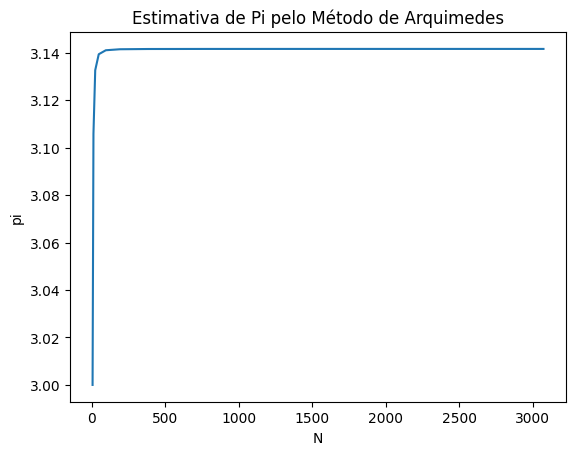

In [9]:
# grafico dos valores de pi

import matplotlib.pyplot as plt
import pi_metodo_arquimedes_1

pi_valores, N_valores = pi_metodo_arquimedes_1.metodo_arquimedes(10)

plt.plot(N_valores, pi_valores)
plt.xlabel('N')
plt.ylabel('pi')
plt.title('Estimativa de Pi pelo Método de Arquimedes')
plt.show()

## Calculando $\pi$ com o Método de Monte Carlo

Métodos de Monte Carlo são métodos estatísticos baseados em amostragem aleatória que são usados para fazer estimativas aproximadas. É possível obter uma estimativa de $\pi$ baseada no uso de números aleatórios.

<center>
<img src=https://raw.githubusercontent.com/malbouis/Python_intro/master/circulo_inscrito.png width="200">
</center>

* Consideremos um círculo inscrito em um quadrado.
* A área do círculo, $A_C$, é dada por: $\pi r^2$, onde $r$ é o raio do círculo
* A área do quadrado, $A_Q$, é dada por: $(2*r)^2$
* Ao tomarmos a razão entre as áreas, temos que:
$$\frac{A_C}{A_Q} = \frac{\pi r^2}{(2*r)^2} = \frac{\pi}{4}$$

Também podemos estimar o valor da razão da área do círculo sobre o quadrado, $\frac{A_C}{A_Q}$, "jogando" um grande número de "bolinhas" no quadradro com o círculo inscrito e contando o número de vezes que as bolinhas caem dentro do círculo. Esse método também é conhecido como método de Buffon.

**Vocês podem "criar" as bolinhas com um gerador de números aleatórios e fazer a contagem de quantas bolas caem dentro da área do círculo.**

**Façam uma representação gráfica das bolinhas que caíram dentro do círculo e das que caíram fora.**

Qual a sua estimativa de $\pi$ pelo método de Buffon?

Faça também um gráfico com a distribuição das diferentes estimativas de $\pi$ para um certo número de bolinhas que jogamos.

Encontre uma biblioteca de Python que faça ajustes e faça um ajuste de uma distribuição Gaussiana no gráfico obtido acima e determine a estimativa de $\pi \pm \sigma$ baseado na média $\mu$ e largura $\sigma$ do ajuste.

Importe os módulos de estimativa de $\pi$ feitos por outros colegas e compare com o seu resultado.

In [ ]:
# metodo de monte carlos

In [56]:
%%writefile pi_metodo_monte_carlo_1.py

import random

def numero_de_bolinhas_dentro_do_quadrado(n):

  ''' Calcula o número de bolinhas dentro do quadrado'''

  x_coordenadas = []
  y_coordenadas = []

  for i in range(n):
      x = random.uniform(-1, 1)
      y = random.uniform(-1, 1)
      x_coordenadas.append(x)
      y_coordenadas.append(y)
  return x_coordenadas, y_coordenadas

def numero_de_bolinhas_dentro_do_circulo(n):

  ''' Calcula o número de bolinhas dentro do círculo'''

  x_coordenadas , y_coordenadas = numero_de_bolinhas_dentro_do_quadrado(n)
  bolinhas_detro_do_circulo = 0
  for i in range(n):
    x = x_coordenadas[i]
    y = y_coordenadas[i]
    if x**2 + y**2 <= 1:
      bolinhas_detro_do_circulo += 1
  return bolinhas_detro_do_circulo

def metodo_monte_carlo(n):

  ''' Calcula o valor de pi usando o metodo de Monte Carlo'''

  bolinhas_detro_do_circulo = numero_de_bolinhas_dentro_do_circulo(n)
  pi_estimativa = 4 * (bolinhas_detro_do_circulo / n)
  return pi_estimativa

Writing pi_metodo_monte_carlo_1.py


In [57]:
import pi_metodo_monte_carlo_1

pi_estimativa = pi_metodo_monte_carlos_1.metodo_monte_carlo(100000)
print("Estimativa do valor de pi usando o metodo de Monte Carlos:", pi_estimativa)

Estimativa do valor de pi usando o metodo de Monte Carlos: 3.14404


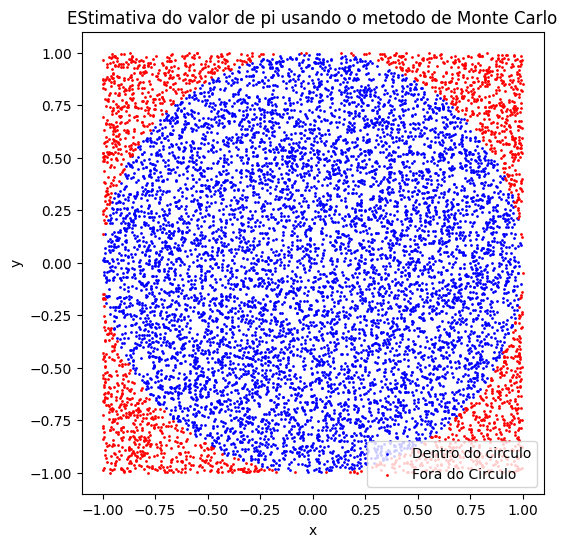

In [58]:
import matplotlib.pyplot as plt
import pi_metodo_monte_carlo_1

def representação_gráfica_monte_carlo(n):

  ''' Representação gráfica do método de Monte Carlo'''

  dentro_do_circulo_x = []
  dentro_do_circulo_y = []
  fora_do_circulo_x = []
  fora_do_circulo_y = []

  x_coordenadas, y_coordenadas = numero_de_bolinhas_dentro_do_quadrado(n)

  for i in range(n):
      x = x_coordenadas[i]
      y = y_coordenadas[i]
      if x**2 + y**2 <= 1:
          dentro_do_circulo_x.append(x)
          dentro_do_circulo_y.append(y)
      else:
          fora_do_circulo_x.append(x)
          fora_do_circulo_y.append(y)

  plt.figure(figsize=(6, 6))
  plt.scatter(dentro_do_circulo_x, dentro_do_circulo_y, color='blue', s=1, label='Dentro do circulo')
  plt.scatter(fora_do_circulo_x, fora_do_circulo_y, color='red', s=1, label='Fora do Circulo')
  plt.gca().set_aspect('equal', adjustable='box')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('EStimativa do valor de pi usando o metodo de Monte Carlo')
  plt.legend()
  plt.show()

representação_gráfica_monte_carlo(10000)

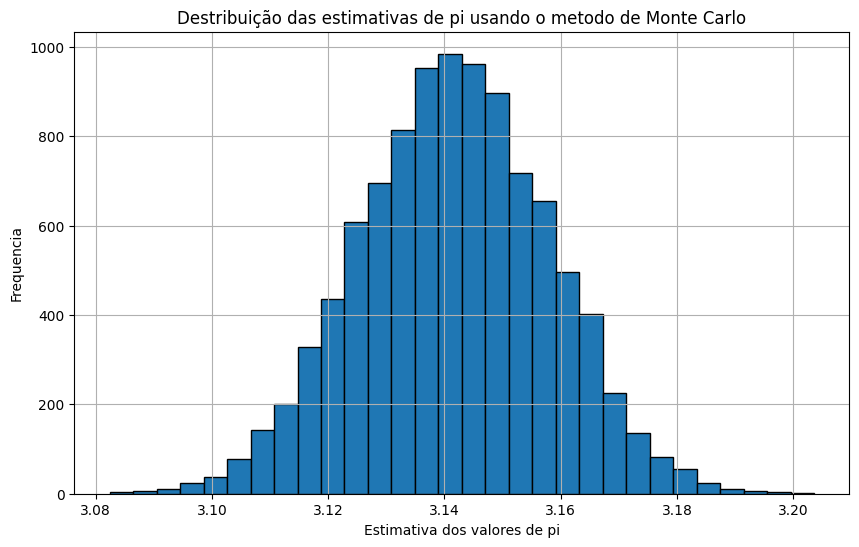

In [34]:
import random
import matplotlib.pyplot as plt

numeros_simulados = 10000

def histograma_pi_valores(numeros_simulados):

  ''' Histograma com estimativas de pi usando o metodo de Monte Carlo'''

  pi_valores = []
  for i in range(numeros_simulados):
    pi_estimativa = metodo_monte_carlo(numeros_simulados)

    pi_valores.append(pi_estimativa)

  plt.figure(figsize=(10, 6))
  plt.hist(pi_valores, bins=30, edgecolor='black')
  plt.xlabel('Estimativa dos valores de pi')
  plt.ylabel('Frequencia')
  plt.title('Destribuição das estimativas de pi usando o metodo de Monte Carlo')
  plt.grid(True)
  plt.show()

histograma_pi_valores(numeros_simulados)

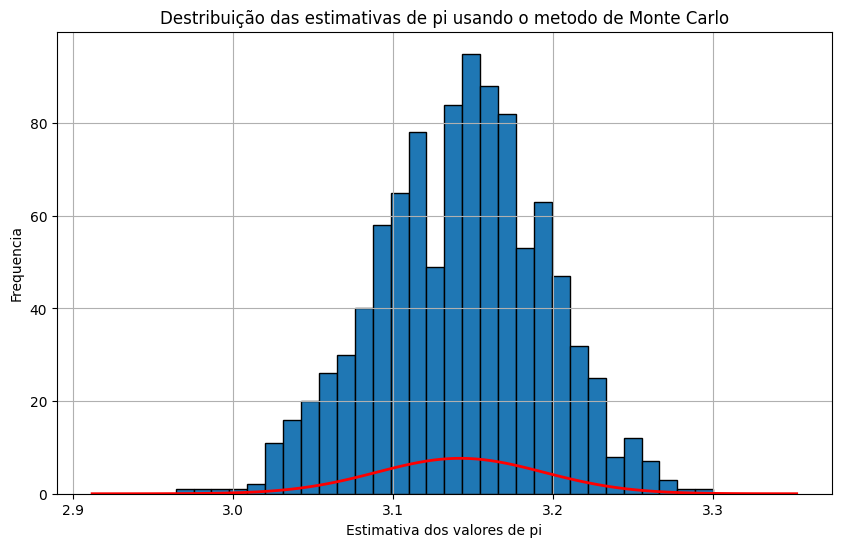

In [53]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


def histograma_pi_valores_com_curva_gaussiana(numeros_simulados):

  ''' Histograma com curva Gaussiana do metodo de Monte Carlo'''

  pi_valores = []
  for i in range(numeros_simulados):
    pi_estimativa = metodo_monte_carlo(numeros_simulados)
    pi_valores.append(pi_estimativa)

  dados = pi_valores

  media = np.mean(dados)
  desvio_padrao = np.std(dados)


  x = np.linspace(min(dados)-desvio_padrao, max(dados)+desvio_padrao, 100)

  y_teorico = norm.pdf(x, media, desvio_padrao)

  plt.figure(figsize=(10, 6))
  plt.hist(pi_valores, bins=30, edgecolor='black')
  plt.plot(x, y_teorico, 'r-', lw=2, label='Curva Gaussiana Teórica')

  plt.xlabel('Estimativa dos valores de pi')
  plt.ylabel('Frequencia')
  plt.title('Destribuição das estimativas de pi usando o metodo de Monte Carlo')
  plt.grid(True)
  plt.show()

histograma_pi_valores_com_curva_gaussiana(1000)